Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

'Avg. Area Income': Avg. Income of residents of the city house is located in.
'Avg. Area House Age': Avg Age of Houses in same city
'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
'Area Population': Population of city house is located in
'Price': Price that the house sold at
'Address': Address for the house

In [126]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [127]:
usa = pd.read_csv('USA_Housing.csv')
usa.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [128]:
usa.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [129]:
usa = usa.rename({'Avg. Area Income':'avg_area_income',
                 'Avg. Area House Age':'avg_area_house_age',
                 'Avg. Area Number of Rooms':'avg_area_number_of_rooms',
                 'Avg. Area Number of Bedrooms':'avg_area_number_of_bedrooms',
                 'Area Population':'area_population',
                 'Price':'price',
                 'Address':'address'}, axis = 1)

In [130]:
usa.head()

,avg_area_income,avg_area_house_age,avg_area_number_of_rooms,avg_area_number_of_bedrooms,area_population,price,address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [131]:
usa.address.nunique()

5000

In [132]:
usa = usa.drop(['address'], axis = 1)

In [133]:
usa.columns

Index(['avg_area_income', 'avg_area_house_age', 'avg_area_number_of_rooms',
       'avg_area_number_of_bedrooms', 'area_population', 'price'],
      dtype='object')

In [134]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   avg_area_income              5000 non-null   float64
 1   avg_area_house_age           5000 non-null   float64
 2   avg_area_number_of_rooms     5000 non-null   float64
 3   avg_area_number_of_bedrooms  5000 non-null   float64
 4   area_population              5000 non-null   float64
 5   price                        5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [135]:
usa.isnull().sum()

avg_area_income                0
avg_area_house_age             0
avg_area_number_of_rooms       0
avg_area_number_of_bedrooms    0
area_population                0
price                          0
dtype: int64

<Figure size 72x72 with 0 Axes>

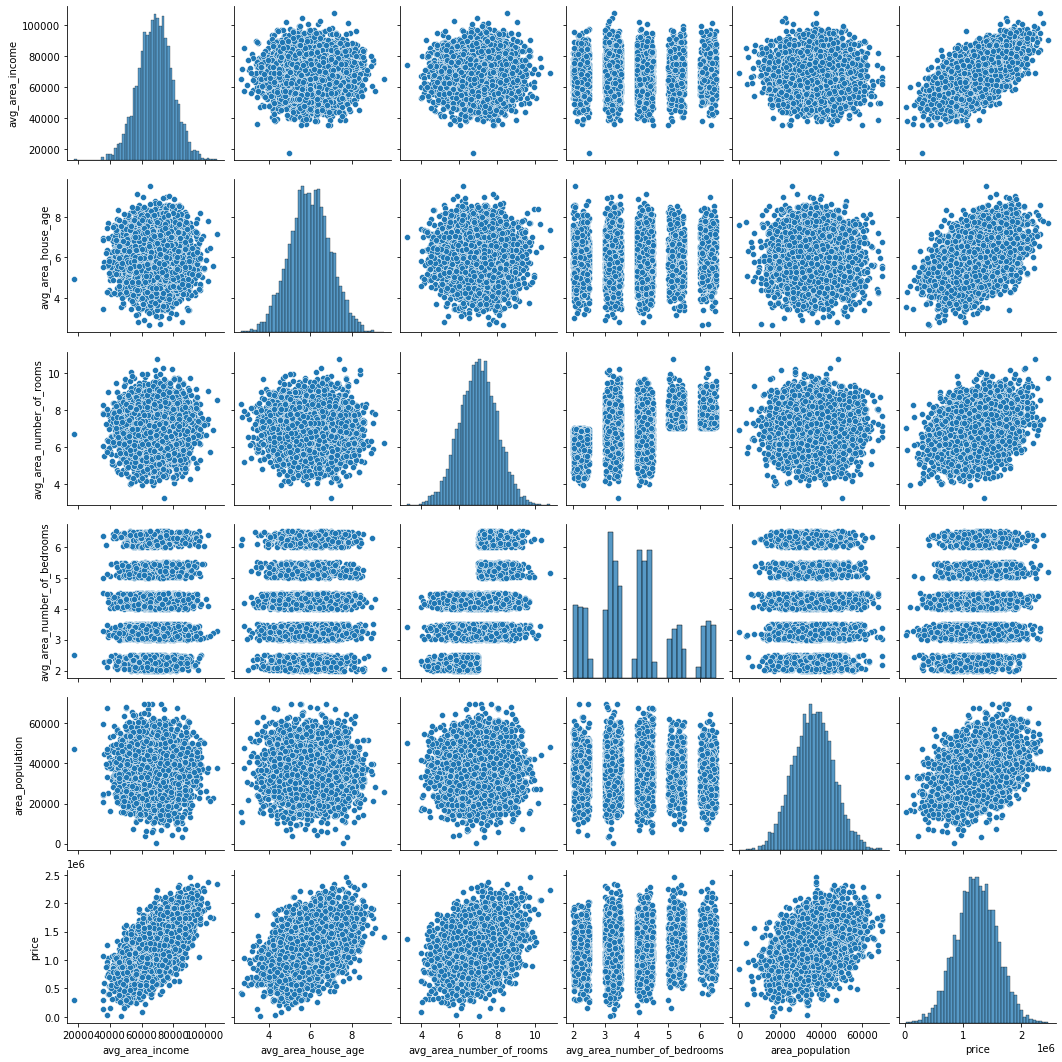

In [136]:
figure(figsize=(1, 1))
sns.pairplot(usa)

<AxesSubplot:xlabel='price', ylabel='Density'>

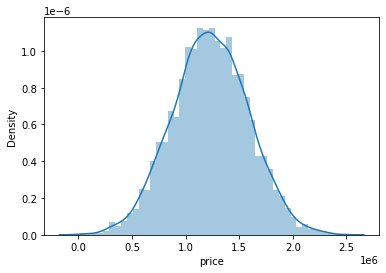

In [137]:
sns.distplot(usa['price'])

<AxesSubplot:>

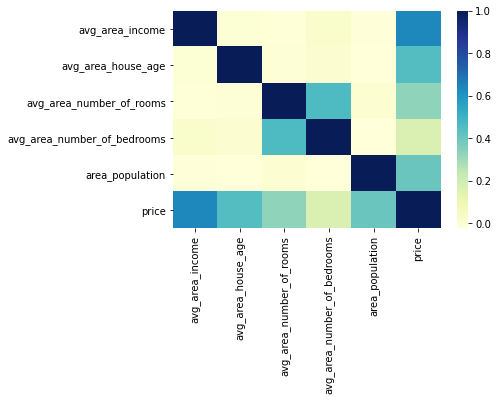

In [138]:
sns.heatmap(usa.corr(), cmap="YlGnBu")

### Modeling

In [139]:
X_train, X_test, y_train, y_test = train_test_split(usa.drop(['price'], axis = 1),
                                                    usa['price'],
                                                    test_size=0.3, random_state=101)

In [140]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [141]:
lm.intercept_

-2641372.6673013847

In [142]:
coeff_df = pd.DataFrame(lm.coef_,X_train.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
avg_area_income,21.617635
avg_area_house_age,165221.119872
avg_area_number_of_rooms,121405.376596
avg_area_number_of_bedrooms,1318.718783
area_population,15.225196


In [143]:
y_pred = lm.predict(X_test)
y_pred

array([1258934.89505291,  822694.63411044, 1742214.39530121, ...,
       1452640.96473338,  645797.13026312, 1364943.76221894])

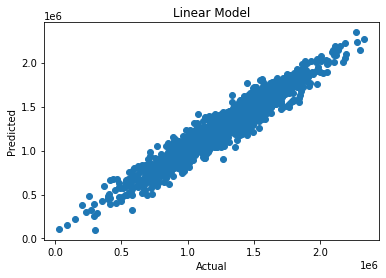

In [144]:
plt.scatter(y_test, y_pred)
plt.title("Linear Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [145]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
1718,1.251689e+06,1.258935e+06
2511,8.730483e+05,8.226946e+05
345,1.696978e+06,1.742214e+06
2521,1.063964e+06,9.729370e+05
54,9.487883e+05,9.945460e+05
...,...,...
3412,7.043759e+05,7.555650e+05
4020,1.254938e+06,1.168110e+06
4635,1.434324e+06,1.452641e+06
1700,5.340775e+05,6.457971e+05


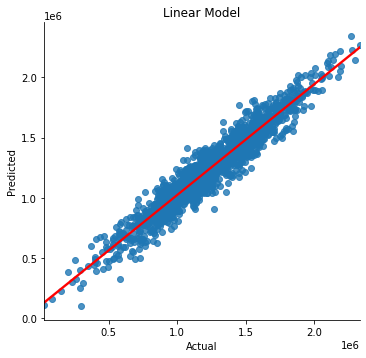

In [146]:
sns.lmplot(x='Actual', y='Predicted', data=df, line_kws={'color':'red'})
plt.title("Linear Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

**Residual Histogram**

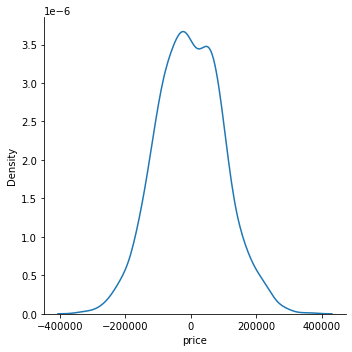

In [147]:
sns.displot((y_test-y_pred), kind='kde')

In [148]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
df.head(1)

,Actual,Predicted
1718,1.251689e+06,1.258935e+06


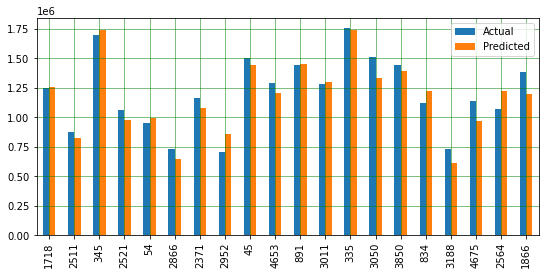

In [149]:
df1 = df.head(20)
df1.plot(kind='bar',figsize=(9,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [150]:
R2 = metrics.r2_score(y_test, y_pred)
print('R^2:' , R2)
n = X_test.shape[0] #sample size
p = X_test.shape[1] #number of predictors
print('Adjusted R^2 :' , 1-(1-R2)*(n-1)/(n-p-1))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9185060945363626
Adjusted R^2 : 0.9182333572356141
MAE: 81257.55795855928
MSE: 10169125565.897568
RMSE: 100842.0823163503
